In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import binarize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
368,9011971,M,21.710,17.25,140.90,1546.0,0.09384,0.08562,0.1168,0.08465,0.1717,0.05054,1.2070,1.051,7.733,224.10,0.005568,0.01112,0.02096,0.01197,0.01263,0.001803,30.75,26.44,199.50,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494,NaN
64,85922302,M,12.680,23.84,82.69,499.0,0.11220,0.12620,0.1128,0.06873,0.1905,0.06590,0.4255,1.178,2.927,36.46,0.007781,0.02648,0.02973,0.01290,0.01635,0.003601,17.09,33.47,111.80,888.3,0.1851,0.4061,0.4024,0.1716,0.3383,0.10310,NaN
391,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0000,0.00000,0.1985,0.07098,0.5169,2.079,3.167,28.85,0.015820,0.01966,0.00000,0.00000,0.01865,0.006736,10.17,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.0000,0.2445,0.08865,NaN
242,883852,B,11.300,18.19,73.93,389.4,0.09592,0.13250,0.1548,0.02854,0.2054,0.07669,0.2428,1.642,2.369,16.39,0.006663,0.05914,0.08880,0.01314,0.01995,0.008675,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.1218,0.3308,0.12970,NaN
536,91979701,M,14.270,22.55,93.77,629.8,0.10380,0.11540,0.1463,0.06139,0.1926,0.05982,0.2027,1.851,1.895,18.54,0.006113,0.02583,0.04645,0.01276,0.01451,0.003756,15.29,34.27,104.30,728.3,0.1380,0.2733,0.4234,0.1362,0.2698,0.08351,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df["Unnamed: 32"].isnull().sum()

569

In [7]:
# dropping the irrelevant column at last "Unnamed: 32"
df.drop(columns=["Unnamed: 32"], inplace=True)

In [8]:
### Dropping Irrelevant columns
df.drop(columns=["id"],inplace=True)

In [9]:
df.shape

(569, 31)

In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### It seems there is no null value in the entire dataset

In [11]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

#### All the columns are numerical except column "diagnosis"

In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Univariate Analysis

In [13]:
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

#### Skeweness exists in most of the columns and all of them are positively skewed 

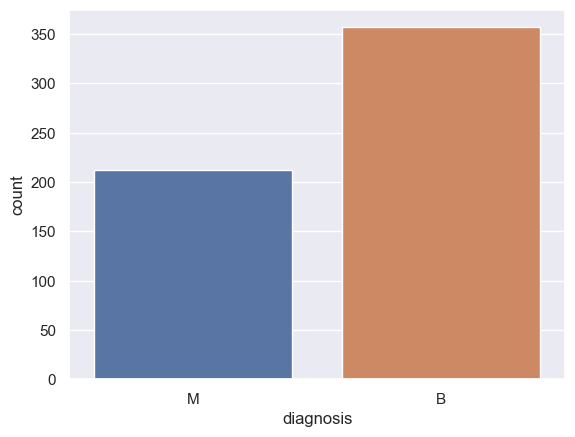

In [14]:
sns.countplot(x="diagnosis",data=df)
plt.show()

#### M refers to Malignant (Cancerous) and B refers to Benign (Not Cancerous).
#### We can see, people not having cancer are comparatively higher as compared to people having cancer. People not having cancer consists of ~63% data whereas people having cancer consists of ~37% data

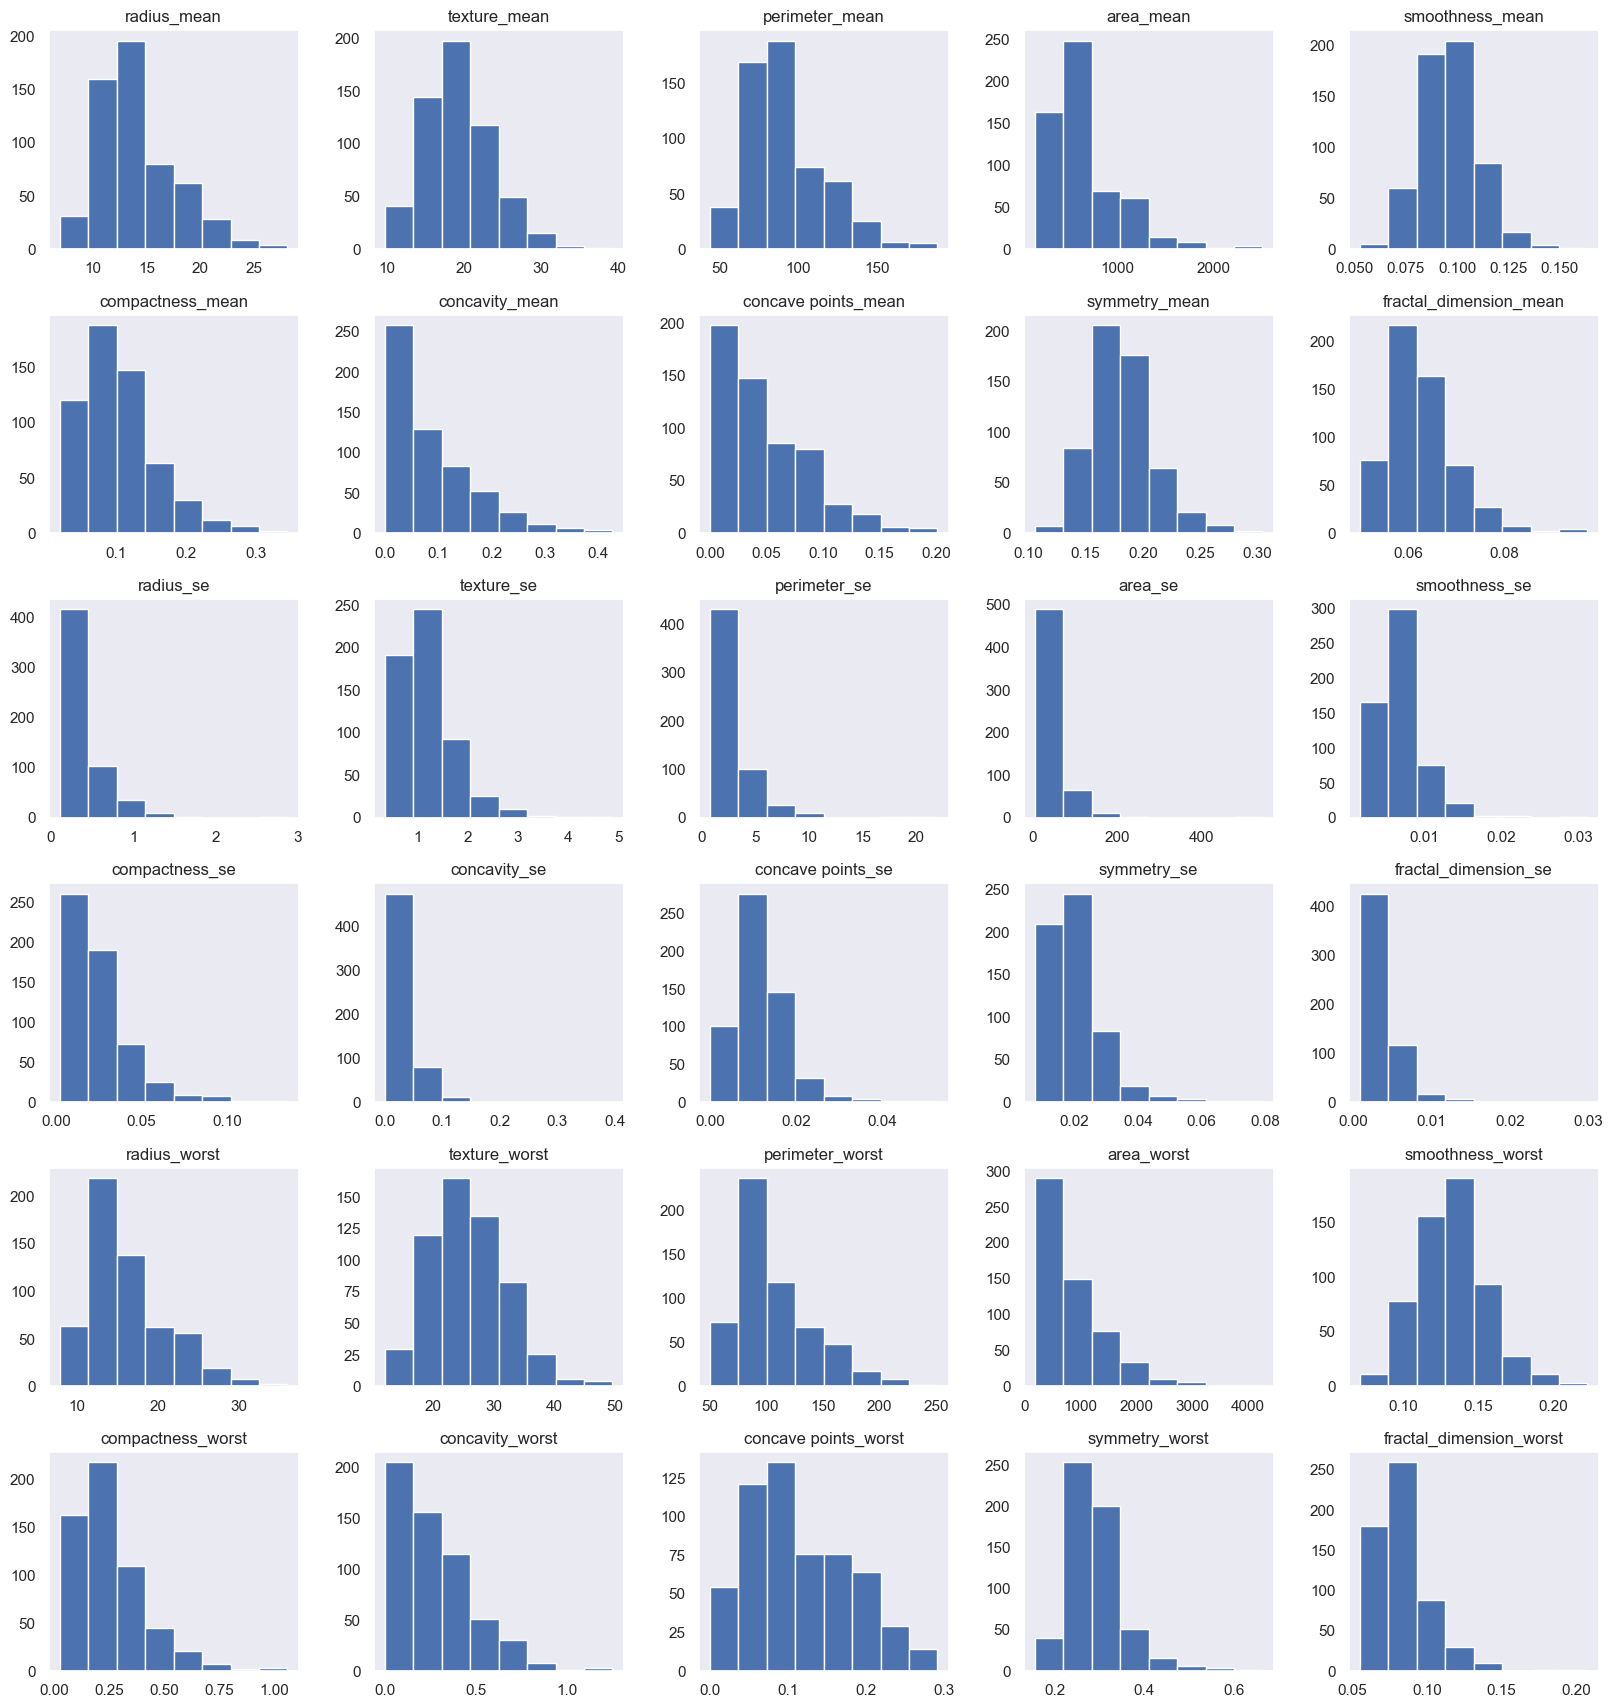

In [15]:
df.iloc[:,1:].hist(figsize=(20,25), layout=(7,5), sharex=False,sharey=False,bins=8, grid=False)
plt.show()

In [16]:
#df.iloc[:,1:].plot(kind="density", subplots=True,layout=(8,4), sharex=False,sharey=False,grid=False, figsize=(30,30),fontsize=15)
#plt.show()

### Bivariate Analysis

In [17]:
le=LabelEncoder()
df["diagnosis"]=le.fit_transform(df["diagnosis"])

In [18]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

#### After applying label encoding, cancerous people are labelled as 1 whereas non cancerous people are labelled as 0

In [19]:
df.sample()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
430,1,14.9,22.53,102.1,685.0,0.09947,0.2225,0.2733,0.09711,0.2041,0.06898,0.253,0.8749,3.466,24.19,0.006965,0.06213,0.07926,0.02234,0.01499,0.005784,16.35,27.57,125.4,832.7,0.1419,0.709,0.9019,0.2475,0.2866,0.1155


In [20]:
#sns.pairplot(df,diag_kind="kde", hue="diagnosis")

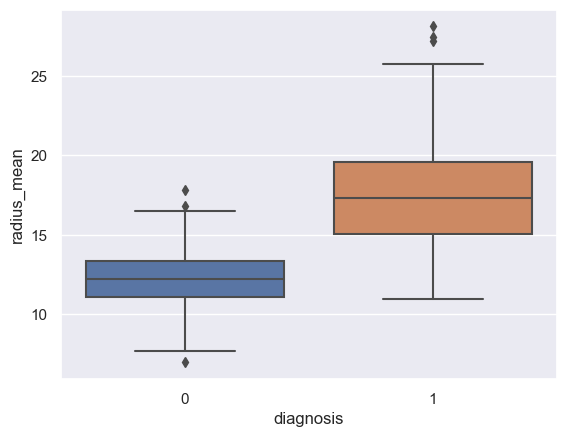

In [21]:
sns.boxplot(x="diagnosis", y="radius_mean", data=df)
plt.show()

#### People with high radius_mean leads to more chances of breast cancer

In [22]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

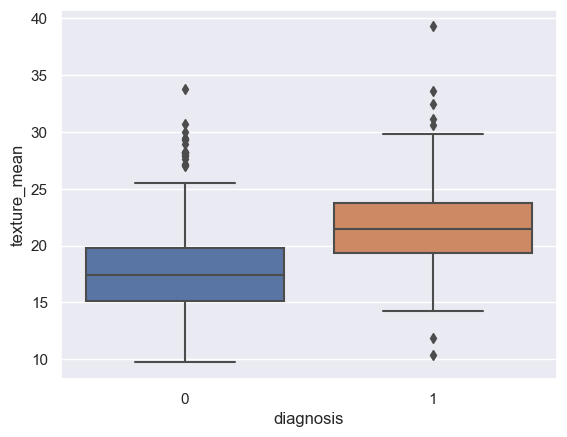

In [23]:
sns.boxplot(x="diagnosis", y="texture_mean", data=df)
plt.show()

#### People with high texture_mean leads to more chances of breast cancer

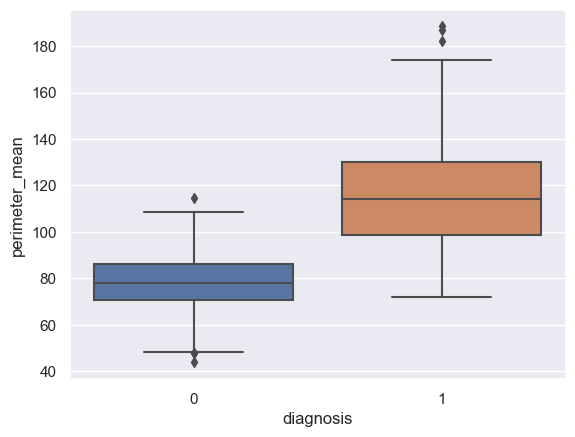

In [24]:
sns.boxplot(x="diagnosis", y="perimeter_mean", data=df)
plt.show()

#### People with high perimeter_mean leads to more chances of breast cancer

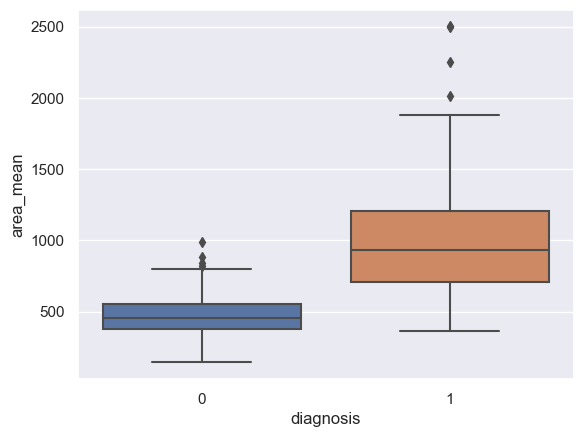

In [25]:
sns.boxplot(x="diagnosis", y="area_mean", data=df)
plt.show()

#### People with high area_mean leads to more chances of breast cancer

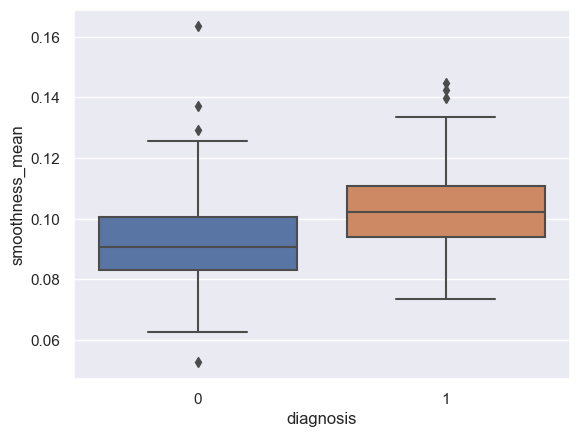

In [26]:
sns.boxplot(x="diagnosis", y="smoothness_mean", data=df)
plt.show()

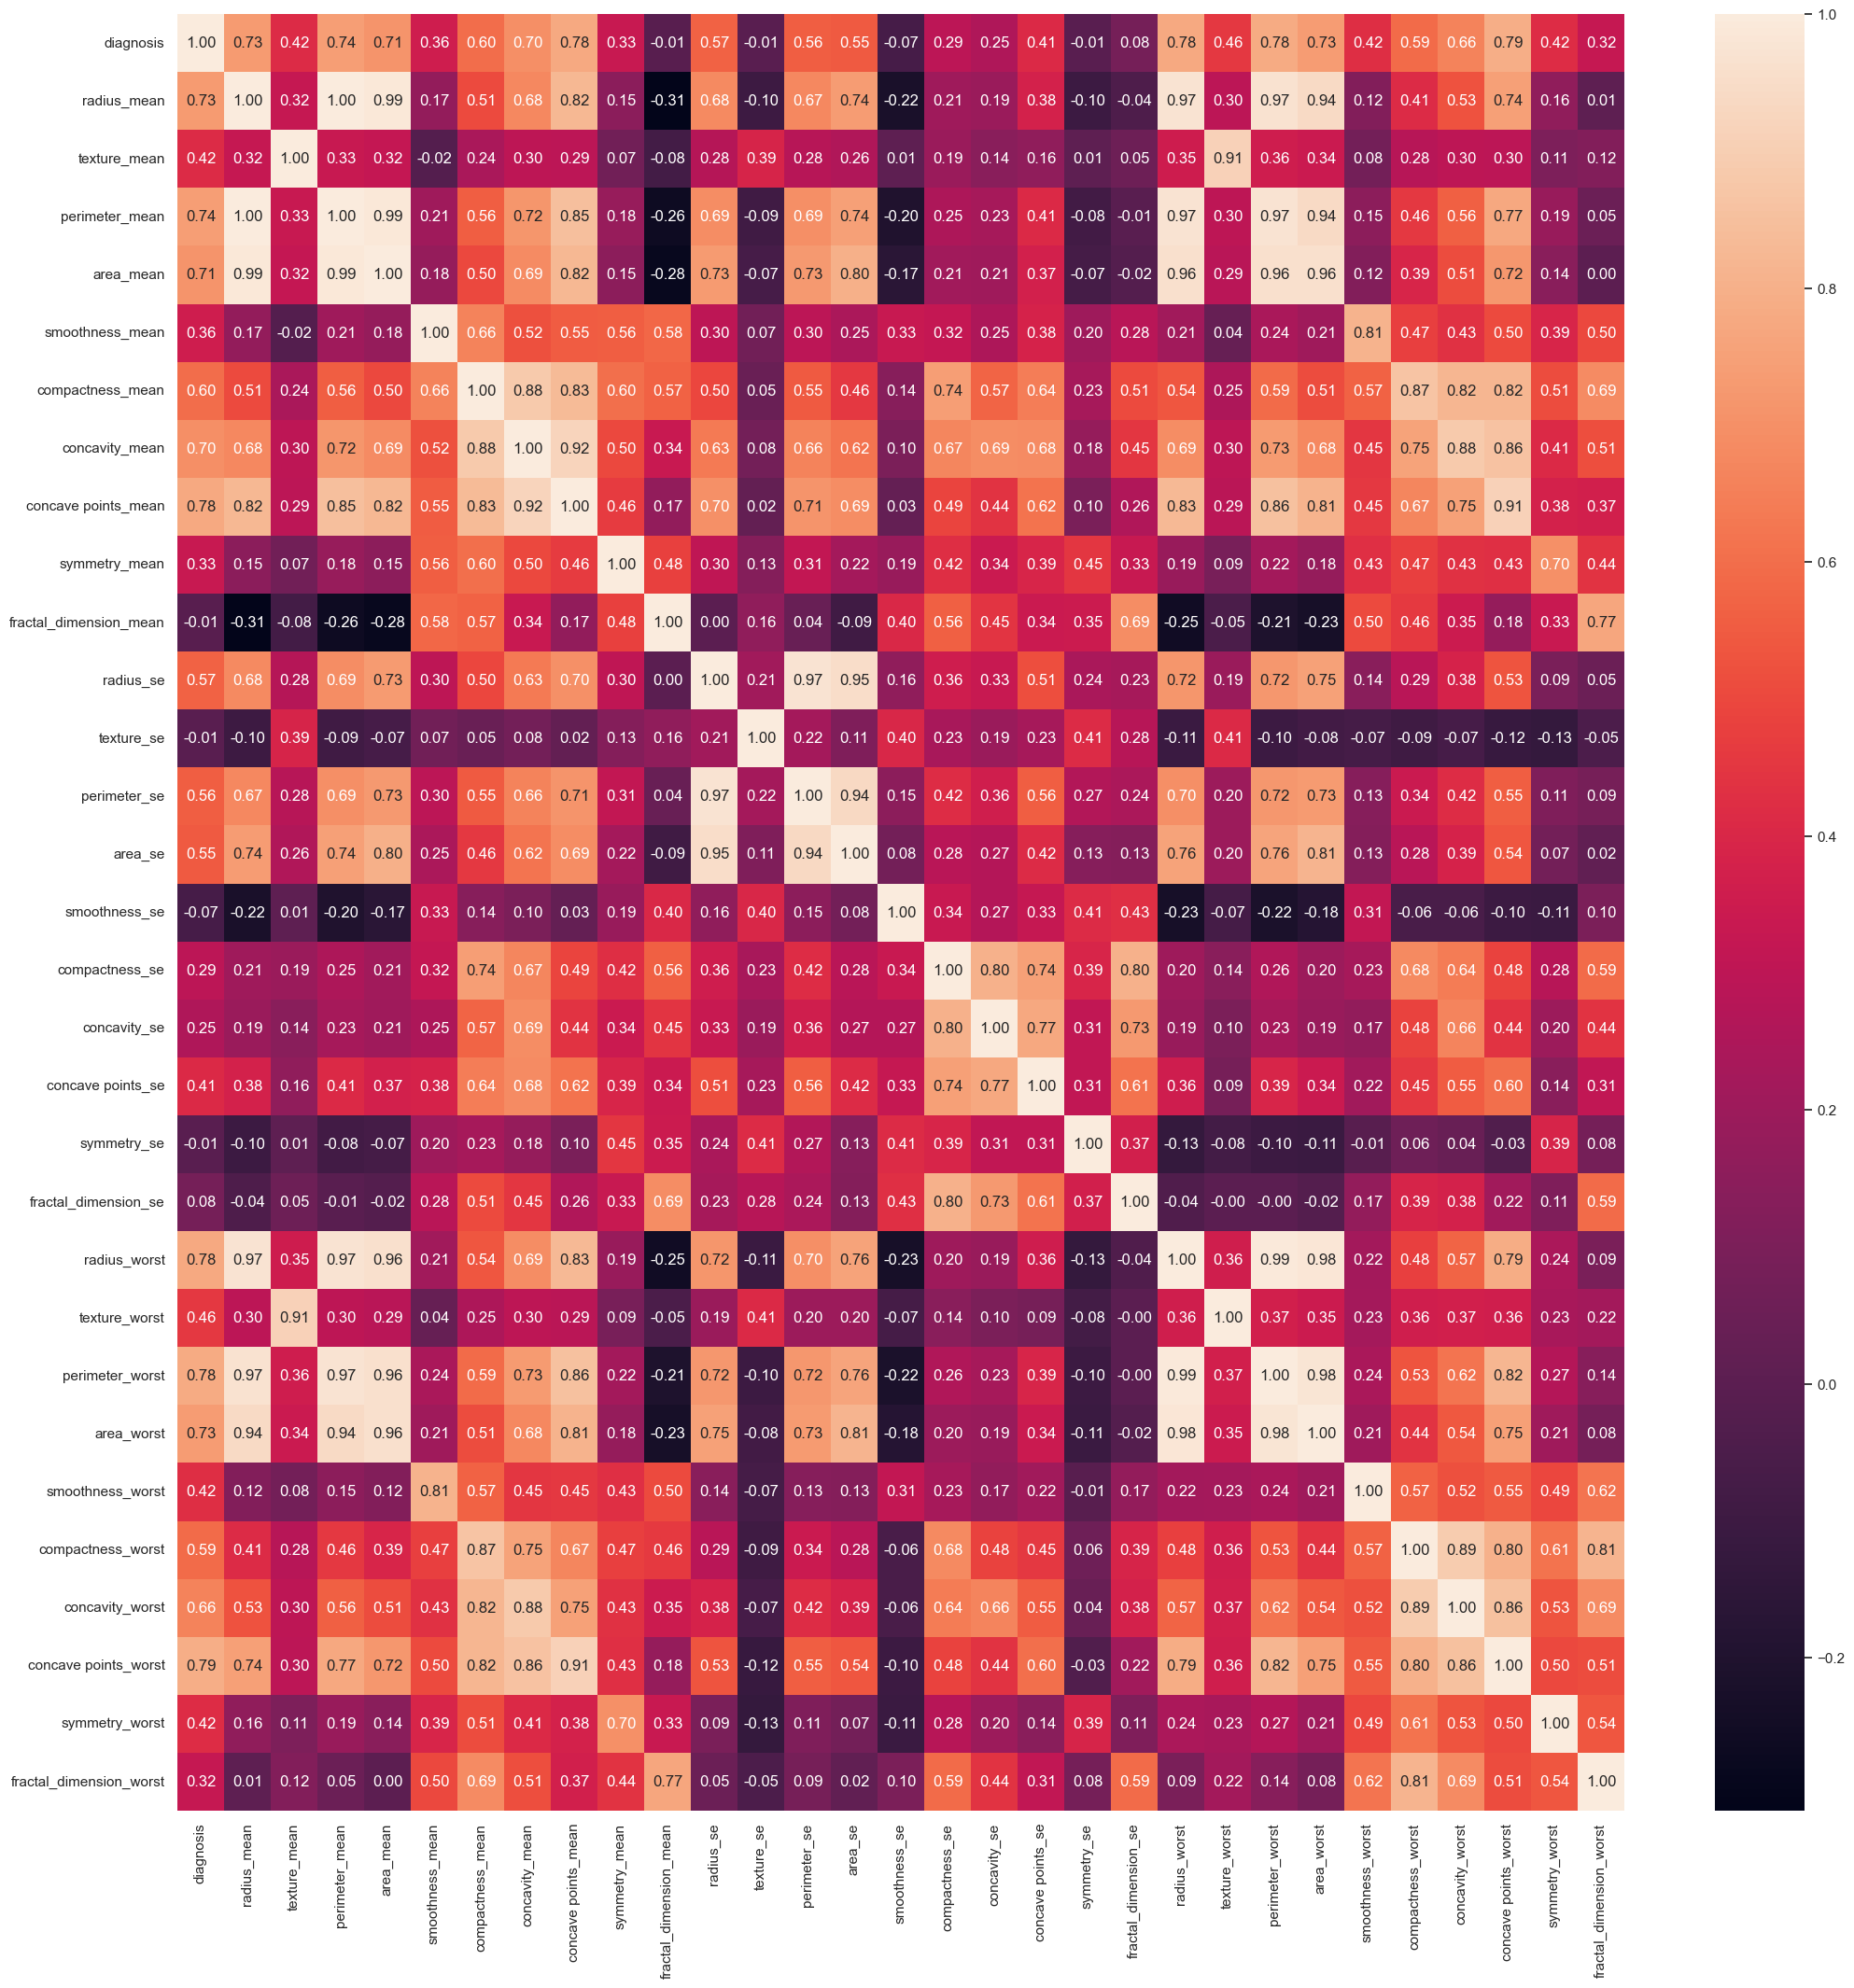

In [27]:
### Correlation Matrix
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.show()

#### Some of the insights from correlation Matrix
#### 1. Diagnosis has strong relationship with concave_points_mean, radius_worst, perimteter_worst and
####    concave_points_worst 
#### 2. area_mean and radius_mean, radius_mean and perimeter mean, radius_mean and radius_worst, 
####   radius_mean and perimeter worst, radius_mean and area_worst are strongly correlated with each other
#### 3. texture_mean and texture_worst, area_mean and perimeter_mean, perimeter_mean and radius_worst, 
####    perimeter_mean and perimeter_worst,  perimeter_mean and area_worst are strongly correlated with each other

### Machine Learning Approach 1

In [28]:
X=df.drop(columns="diagnosis")
Y=df["diagnosis"]

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

#### Logistic Regression

In [30]:
lr=LogisticRegression(solver="saga")
lr.fit(X_train,Y_train)
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

0.8994974874371859
0.9298245614035088


In [31]:
lr_y_pred=lr.predict(X_test)
print(classification_report(Y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       109
           1       0.98      0.82      0.89        62

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



<Axes: >

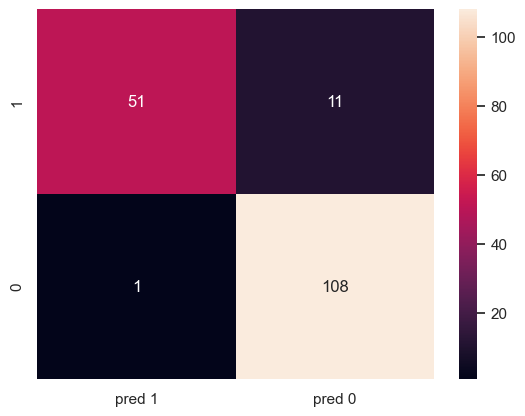

In [32]:
cm=confusion_matrix(Y_test,lr_y_pred, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["pred 1","pred 0"]])
sns.heatmap(df_cm,annot=True, fmt="g")

In [ ]:
#### Adjusting the classification Threshold

In [33]:
lr_y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [34]:
lr.predict_proba(X_test)[0:10,:]

array([[0.68162146, 0.31837854],
       [0.72837589, 0.27162411],
       [0.83711434, 0.16288566],
       [0.76782129, 0.23217871],
       [0.78793818, 0.21206182],
       [0.59157547, 0.40842453],
       [0.69137088, 0.30862912],
       [0.80360079, 0.19639921],
       [0.00754177, 0.99245823],
       [0.75624191, 0.24375809]])

In [35]:
#### store predicted probabilities of diabetic class
lr_pred_prob_diabetic = lr.predict_proba(X_test)[:,1]
#### Binarize it using threshold 0.3
y_pred_new_class= binarize([lr_pred_prob_diabetic], threshold=0.4)[0]
print(classification_report(Y_test,y_pred_new_class))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       109
           1       0.93      0.87      0.90        62

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



#### Naive Bayes

In [36]:
nb=GaussianNB()
nb.fit(X_train,Y_train)
print(nb.score(X_train,Y_train))
print(nb.score(X_test,Y_test))

0.9422110552763819
0.935672514619883


In [37]:
nb_y_pred=nb.predict(X_test)
print(classification_report(Y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       109
           1       0.95      0.87      0.91        62

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



#### KNN

In [169]:
knn=KNeighborsClassifier()

In [ ]:
#### Finding the best combination of hyperparameters

In [170]:
n_neighbours=list(range(6,50))
weights=['uniform', 'distance']
dic=dict(n_neighbors=n_neighbours,weights=weights)
grid=GridSearchCV(knn,param_grid=dic,cv=10)

In [171]:
grid_knn=grid.fit(X_train,Y_train)

In [172]:
print('n_neighbor', grid_knn.best_estimator_.get_params()['n_neighbors'])


print('weights:', grid_knn.best_estimator_.get_params()['weights'])

Neighbor = grid_knn.best_estimator_.get_params()['n_neighbors']

Weights = grid_knn.best_estimator_.get_params()['weights']



KNN = KNeighborsClassifier(n_neighbors=Neighbor, weights=Weights)

KNN.fit(X_train,Y_train)
print(KNN.score(X_train,Y_train))
print(KNN.score(X_test,Y_test))

n_neighbor 9
weights: uniform
0.9346733668341709
0.9181286549707602


In [161]:
KNN_y_pred = KNN.predict(X_test)
print(classification_report(KNN_y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       118
           1       0.84      0.91      0.87        53

    accuracy                           0.92       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



#### Support Vector Mahcine

In [39]:
svm=SVC()

In [40]:
kernel=["rbf","sigmoid"]
C=[50,10,0.1,1.0,0.01]
gamma=["scale"]
svm_dic=dict(C=C,kernel=kernel,gamma=gamma)
grid_svm=GridSearchCV(svm,param_grid=svm_dic,cv=10)
grid_svm.fit(X_train,Y_train)
#### Unable to use "poly" as kernel as it was taking lot of time to run

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 10, 0.1, 1.0, 0.01], 'gamma': ['scale'],
                         'kernel': ['rbf', 'sigmoid']})

In [42]:
best_KERNEL=grid_svm.best_estimator_.get_params()["kernel"]
best_C=grid_svm.best_estimator_.get_params()["C"]
best_gamma=grid_svm.best_estimator_.get_params()["gamma"]
SVM=SVC(kernel=best_KERNEL,C=best_C,gamma=best_gamma)
SVM.fit(X_train,Y_train)
print(SVM.score(X_train,Y_train))
print(SVM.score(X_test,Y_test))

0.9195979899497487
0.9649122807017544


In [57]:
SVM_y_pred = SVM.predict(X_test)
print(classification_report(SVM_y_pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       115
           1       0.90      1.00      0.95        56

    accuracy                           0.96       171
   macro avg       0.95      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



#### Decision Trees

In [44]:
dtc=DecisionTreeClassifier()

In [45]:
max_depth=list(range(4,100))
criterion=["gini","entropy"]
tree_dic = dict(max_depth=max_depth,criterion=criterion)
grid_tree=GridSearchCV(dtc,param_grid=tree_dic,cv=10)
grid_tree.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29, 30, 31, 32, 33, ...]})

In [46]:
print("Max Depth:", grid_tree.best_estimator_.get_params()["max_depth"])
print("Criterion:", grid_tree.best_estimator_.get_params()["criterion"])
Max_Depth=grid_tree.best_estimator_.get_params()["max_depth"]
Criterion=grid_tree.best_estimator_.get_params()["criterion"]
TREE=DecisionTreeClassifier(max_depth=Max_Depth,criterion=Criterion)
TREE.fit(X_train,Y_train)
print(TREE.score(X_train,Y_train))
print(TREE.score(X_test,Y_test))

Max Depth: 91
Criterion: entropy
1.0
0.9239766081871345


In [47]:
TREE_y_pred=TREE.predict(X_test)
print(classification_report(Y_test,TREE_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       109
           1       0.92      0.87      0.89        62

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



#### Bagging

In [49]:
bgc=BaggingClassifier()

In [53]:
estimator = [TREE]
n_estimators=list(range(1,100))
bgc_dict=dict(estimator=estimator,n_estimators=n_estimators)
bgc_grid=GridSearchCV(bgc,param_grid=bgc_dict,cv=10)
bgc_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=BaggingClassifier(),
             param_grid={'estimator': [DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=91)],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [55]:
best_n_estimators=bgc_grid.best_estimator_.get_params()["n_estimators"]
BGC=BaggingClassifier(estimator=TREE,n_estimators=best_n_estimators)
BGC.fit(X_train,Y_train)
print(BGC.score(X_train,Y_train))
print(BGC.score(X_test,Y_test))

1.0
0.9649122807017544


In [90]:
print(best_n_estimators)

40


In [56]:
BGC_y_pred=BGC.predict(X_test)
print(classification_report(Y_test,BGC_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.95      0.95      0.95        62

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



#### Adaboosting

In [58]:
abc=AdaBoostClassifier()

In [59]:
abc_estimator = [TREE]
abc_n_estimators=list(range(1,100))
abc_dict=dict(estimator=abc_estimator,n_estimators=abc_n_estimators)
abc_grid=GridSearchCV(abc,param_grid=abc_dict,cv=10)
abc_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'estimator': [DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=91)],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [60]:
best_abc_n_estimators=abc_grid.best_estimator_.get_params()["n_estimators"]
ABC=AdaBoostClassifier(estimator=TREE,n_estimators=best_abc_n_estimators)
ABC.fit(X_train,Y_train)
print(ABC.score(X_train,Y_train))
print(ABC.score(X_test,Y_test))

1.0
0.9181286549707602


In [61]:
ABC_y_pred=ABC.predict(X_test)
print(classification_report(Y_test,ABC_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       109
           1       0.89      0.89      0.89        62

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



#### Gradient Boosting

In [62]:
gbc=GradientBoostingClassifier()

In [64]:
gbc_n_estimators=list(range(1,100))
gbc_dict=dict(n_estimators=gbc_n_estimators)
gbc_grid=GridSearchCV(gbc,param_grid=gbc_dict,cv=10)
gbc_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [70]:
best_gbc_n_estimators=gbc_grid.best_estimator_.get_params()["n_estimators"]
GBC=GradientBoostingClassifier(n_estimators=best_gbc_n_estimators)
GBC.fit(X_train,Y_train)
print(GBC.score(X_train,Y_train))
print(GBC.score(X_test,Y_test))

1.0
0.9590643274853801


In [71]:
GBC_y_pred=GBC.predict(X_test)
print(classification_report(Y_test,GBC_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       109
           1       0.97      0.92      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



#### XGBoosting

In [73]:
xbc=XGBClassifier()

In [74]:
xbc_n_estimators=list(range(1,100))
xbc_dict=dict(n_estimators=xbc_n_estimators)
xbc_grid=GridSearchCV(xbc,param_grid=xbc_dict,cv=10)
xbc_grid.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [83]:
best_xbc_n_estimators=xbc_grid.best_estimator_.get_params()["n_estimators"]
XBC=XGBClassifier(n_estimators=best_xbc_n_estimators)
XBC.fit(X_train,Y_train)
print(XBC.score(X_train,Y_train))
print(XBC.score(X_test,Y_test))

1.0
0.9649122807017544


In [91]:
print(best_xbc_n_estimators)

38


In [78]:
XBC_y_pred=XBC.predict(X_test)
print(classification_report(Y_test,XBC_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       109
           1       0.92      0.94      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



#### Random Forest

In [79]:
rfc=RandomForestClassifier()

In [82]:
rfc_n_estimators=list(range(1,100))
rfc_max_features=list(range(9,22))
rfc_dict=dict(n_estimators=rfc_n_estimators, max_features=rfc_max_features)
rfc_grid=GridSearchCV(rfc,param_grid=rfc_dict,cv=10)
rfc_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20, 21],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [85]:
best_rfc_n_estimators=rfc_grid.best_estimator_.get_params()["n_estimators"]
best_rfc_max_features=rfc_grid.best_estimator_.get_params()["max_features"]
RFC=RandomForestClassifier(n_estimators=best_rfc_n_estimators, max_features=best_rfc_max_features)
RFC.fit(X_train,Y_train)
print(RFC.score(X_train,Y_train))
print(RFC.score(X_test,Y_test))

0.992462311557789
0.9532163742690059


In [88]:
print(best_rfc_n_estimators)
print(best_rfc_max_features)

5
14


In [89]:
RFC_y_pred=RFC.predict(X_test)
print(classification_report(Y_test,RFC_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       109
           1       0.94      0.94      0.94        62

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### By using approach 1, we're getting best score using Bagging and XG Boosting Techniques
### In Bagging and XG Boosting we're getting same score
### For train data it is 1 and for test data it is 96.5

## Machine learning Approach 2 --> Appyling Standardization

In [94]:
scaler=StandardScaler()

In [95]:
X_scaled = scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3)

#### Logistic Regression

In [96]:
lr_new=LogisticRegression(solver="saga")
lr_new.fit(X_train,Y_train)
print(lr_new.score(X_train,Y_train))
print(lr_new.score(X_test,Y_test))

0.9874371859296482
0.9766081871345029


In [97]:
lr_new_y_pred=lr_new.predict(X_test)
print(classification_report(Y_test,lr_new_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.95      0.98      0.97        61

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



#### Naive Bayes

In [98]:
nb_new=GaussianNB()
nb_new.fit(X_train,Y_train)
print(nb_new.score(X_train,Y_train))
print(nb_new.score(X_test,Y_test))

0.9271356783919598
0.9473684210526315


In [99]:
nb_new_y_pred=nb_new.predict(X_test)
print(classification_report(Y_test,nb_new_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       110
           1       0.91      0.95      0.93        61

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



#### KNN

In [100]:
knn=KNeighborsClassifier()
n_neighbours=list(range(6,50))
weights=['uniform', 'distance']
dic=dict(n_neighbors=n_neighbours,weights=weights)
grid=GridSearchCV(knn,param_grid=dic,cv=10)
grid_knn=grid.fit(X_train,Y_train)

In [101]:
print('n_neighbor', grid_knn.best_estimator_.get_params()['n_neighbors'])


print('weights:', grid_knn.best_estimator_.get_params()['weights'])

Neighbor = grid_knn.best_estimator_.get_params()['n_neighbors']

Weights = grid_knn.best_estimator_.get_params()['weights']



KNN = KNeighborsClassifier(n_neighbors=Neighbor, weights=Weights)

KNN.fit(X_train,Y_train)
print(KNN.score(X_train,Y_train))
print(KNN.score(X_test,Y_test))

n_neighbor 6
weights: distance
1.0
0.9707602339181286


In [102]:
KNN_y_pred = KNN.predict(X_test)
print(classification_report(KNN_y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       109
           1       0.97      0.95      0.96        62

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



#### Support vector Machine

In [103]:
svm=SVC()
kernel=["rbf","sigmoid"]
C=[50,10,0.1,1.0,0.01]
gamma=["scale"]
svm_dic=dict(C=C,kernel=kernel,gamma=gamma)
grid_svm=GridSearchCV(svm,param_grid=svm_dic,cv=10)
grid_svm.fit(X_train,Y_train)
#### Unable to use "poly" as kernel as it was taking lot of time to run

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [50, 10, 0.1, 1.0, 0.01], 'gamma': ['scale'],
                         'kernel': ['rbf', 'sigmoid']})

In [104]:
best_KERNEL=grid_svm.best_estimator_.get_params()["kernel"]
best_C=grid_svm.best_estimator_.get_params()["C"]
best_gamma=grid_svm.best_estimator_.get_params()["gamma"]
SVM=SVC(kernel=best_KERNEL,C=best_C,gamma=best_gamma)
SVM.fit(X_train,Y_train)
print(SVM.score(X_train,Y_train))
print(SVM.score(X_test,Y_test))

0.9874371859296482
0.9649122807017544


In [105]:
SVM_y_pred = SVM.predict(X_test)
print(classification_report(SVM_y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       106
           1       0.98      0.92      0.95        65

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



#### Decision Trees

In [106]:
dtc=DecisionTreeClassifier()
max_depth=list(range(4,100))
criterion=["gini","entropy"]
tree_dic = dict(max_depth=max_depth,criterion=criterion)
grid_tree=GridSearchCV(dtc,param_grid=tree_dic,cv=10)
grid_tree.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                       26, 27, 28, 29, 30, 31, 32, 33, ...]})

In [107]:
print("Max Depth:", grid_tree.best_estimator_.get_params()["max_depth"])
print("Criterion:", grid_tree.best_estimator_.get_params()["criterion"])
Max_Depth=grid_tree.best_estimator_.get_params()["max_depth"]
Criterion=grid_tree.best_estimator_.get_params()["criterion"]
TREE=DecisionTreeClassifier(max_depth=Max_Depth,criterion=Criterion)
TREE.fit(X_train,Y_train)
print(TREE.score(X_train,Y_train))
print(TREE.score(X_test,Y_test))

Max Depth: 76
Criterion: entropy
1.0
0.9415204678362573


In [108]:
TREE_y_pred=TREE.predict(X_test)
print(classification_report(Y_test,TREE_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       110
           1       0.88      0.97      0.92        61

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171



#### Bagging

In [109]:
bgc=BaggingClassifier()
estimator = [TREE]
n_estimators=list(range(1,100))
bgc_dict=dict(estimator=estimator,n_estimators=n_estimators)
bgc_grid=GridSearchCV(bgc,param_grid=bgc_dict,cv=10)
bgc_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=BaggingClassifier(),
             param_grid={'estimator': [DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=76)],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [110]:
best_n_estimators=bgc_grid.best_estimator_.get_params()["n_estimators"]
BGC=BaggingClassifier(estimator=TREE,n_estimators=best_n_estimators)
BGC.fit(X_train,Y_train)
print(BGC.score(X_train,Y_train))
print(BGC.score(X_test,Y_test))

1.0
0.9532163742690059


In [111]:
BGC_y_pred=BGC.predict(X_test)
print(classification_report(Y_test,BGC_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       110
           1       0.91      0.97      0.94        61

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



#### Adaboosting

In [112]:
abc=AdaBoostClassifier()
abc_estimator = [TREE]
abc_n_estimators=list(range(1,100))
abc_dict=dict(estimator=abc_estimator,n_estimators=abc_n_estimators)
abc_grid=GridSearchCV(abc,param_grid=abc_dict,cv=10)
abc_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'estimator': [DecisionTreeClassifier(criterion='entropy',
                                                              max_depth=76)],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [113]:
best_abc_n_estimators=abc_grid.best_estimator_.get_params()["n_estimators"]
ABC=AdaBoostClassifier(estimator=TREE,n_estimators=best_abc_n_estimators)
ABC.fit(X_train,Y_train)
print(ABC.score(X_train,Y_train))
print(ABC.score(X_test,Y_test))

1.0
0.9415204678362573


In [114]:
ABC_y_pred=ABC.predict(X_test)
print(classification_report(Y_test,ABC_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       110
           1       0.89      0.95      0.92        61

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



#### Gradient Boosting

In [115]:
gbc=GradientBoostingClassifier()
gbc_n_estimators=list(range(1,100))
gbc_dict=dict(n_estimators=gbc_n_estimators)
gbc_grid=GridSearchCV(gbc,param_grid=gbc_dict,cv=10)
gbc_grid.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [116]:
best_gbc_n_estimators=gbc_grid.best_estimator_.get_params()["n_estimators"]
GBC=GradientBoostingClassifier(n_estimators=best_gbc_n_estimators)
GBC.fit(X_train,Y_train)
print(GBC.score(X_train,Y_train))
print(GBC.score(X_test,Y_test)) 

1.0
0.9532163742690059


In [117]:
GBC_y_pred=GBC.predict(X_test)
print(classification_report(Y_test,GBC_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       110
           1       0.91      0.97      0.94        61

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



#### XG Boosting

In [121]:
xbc=XGBClassifier()
xbc_n_estimators=list(range(5,100))
xbc_dict=dict(n_estimators=xbc_n_estimators)
xbc_grid=GridSearchCV(xbc,param_grid=xbc_dict,cv=10)
xbc_grid.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19, 20, 21, 22, 23, 24,
                                          25, 26, 27, 28, 29, 30, 31, 32, 33,
                                          34, ...]})

In [122]:
best_xbc_n_estimators=xbc_grid.best_estimator_.get_params()["n_estimators"]
XBC=XGBClassifier(n_estimators=best_xbc_n_estimators)
XBC.fit(X_train,Y_train)
print(XBC.score(X_train,Y_train))
print(XBC.score(X_test,Y_test))

1.0
0.9532163742690059


In [123]:
XBC_y_pred=XBC.predict(X_test)
print(classification_report(Y_test,XBC_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       110
           1       0.91      0.97      0.94        61

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



#### Random Forest

In [125]:
rfc=RandomForestClassifier()
rfc_n_estimators=list(range(4,100))
rfc_max_features=list(range(9,22))
rfc_dict=dict(n_estimators=rfc_n_estimators, max_features=rfc_max_features)
rfc_grid=GridSearchCV(rfc,param_grid=rfc_dict,cv=10)
rfc_grid.fit(X_train,Y_train)
#### Unable to get any output from this code as it was taking lot of time to run

In [ ]:
best_rfc_n_estimators=rfc_grid.best_estimator_.get_params()["n_estimators"]
best_rfc_max_features=rfc_grid.best_estimator_.get_params()["rfc_max_features"]
RFC=RandomForestClassifier(n_estimators=best_rfc_n_estimators, max_features=best_rfc_max_features)
RFC.fit(X_train,Y_train)
print(RFC.score(X_train,Y_train))
print(RFC.score(X_test,Y_test))

In [ ]:
RFC_y_pred=RFC.predict(X_test)
print(classification_report(Y_test,RFC_y_pred))

### In the second approach, we're getting best score using KNN technique. W're getting train score as 1.0
### and test score as 97.

## Overall, if we compare two approaches, we're getting best score using approach 2 i.e., by applying standardization